In [1]:
print("teste")

teste


In [3]:
from pyhdf.SD import SD, SDC

file_path = "./data/2019140132530_69565_CS_2B-CLDCLASS_GRANULE_P1_R05_E08_F03.hdf"

# Abrindo o arquivo HDF4
hdf = SD(file_path, SDC.READ)

# Listando datasets
datasets = hdf.datasets()
print("Datasets disponíveis:")
for name, info in datasets.items():
    print(f"{name}: shape={info[0]}, tipo={info[1]}")


Datasets disponíveis:
Height: shape=('nray:2B-CLDCLASS', 'nbin:2B-CLDCLASS'), tipo=(36949, 125)
cloud_scenario: shape=('nray:2B-CLDCLASS', 'nbin:2B-CLDCLASS'), tipo=(36949, 125)
CloudLayerBase: shape=('nray:2B-CLDCLASS', 'Ncloud:2B-CLDCLASS'), tipo=(36949, 10)
CloudLayerTop: shape=('nray:2B-CLDCLASS', 'Ncloud:2B-CLDCLASS'), tipo=(36949, 10)
CloudLayerType: shape=('nray:2B-CLDCLASS', 'Ncloud:2B-CLDCLASS'), tipo=(36949, 10)


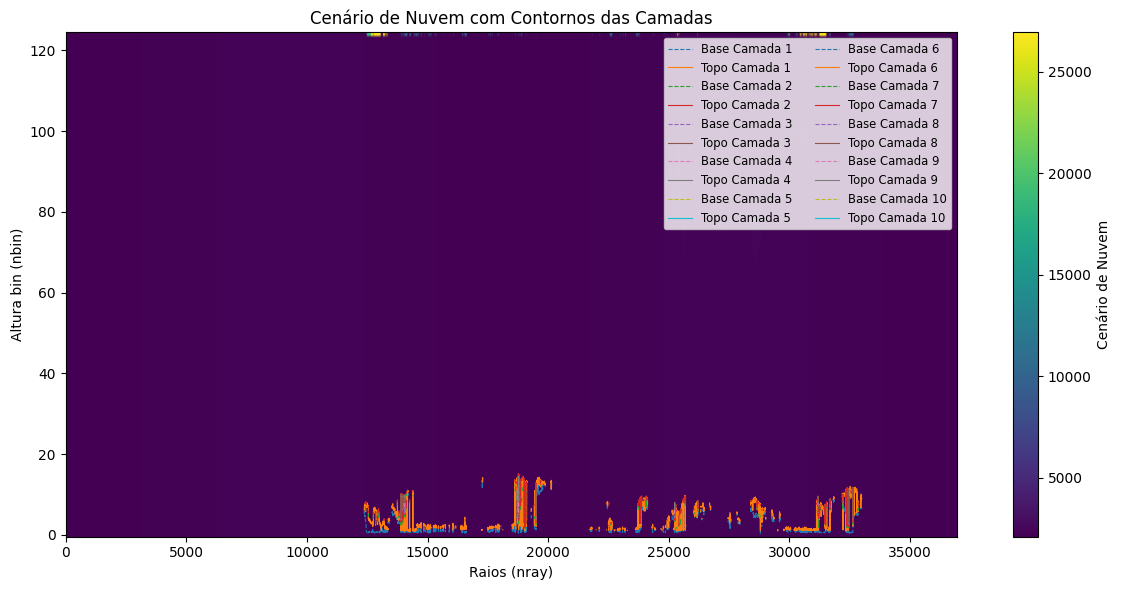

In [5]:
from pyhdf.SD import SD, SDC
import numpy as np
import matplotlib.pyplot as plt

# Caminho do arquivo
file_path = "./data/2019140132530_69565_CS_2B-CLDCLASS_GRANULE_P1_R05_E08_F03.hdf"

# Abrindo o arquivo
hdf = SD(file_path, SDC.READ)

# Extração dos dados
cloud_scenario = np.array(hdf.select("cloud_scenario")[:])
layer_top = np.array(hdf.select("CloudLayerTop")[:])
layer_base = np.array(hdf.select("CloudLayerBase")[:])

# Aplicando máscaras para valores inválidos
cloud_scenario = np.ma.masked_where(cloud_scenario < 0, cloud_scenario)
layer_top = np.ma.masked_where(layer_top < 0, layer_top)
layer_base = np.ma.masked_where(layer_base < 0, layer_base)

# Plot da matriz de cenários de nuvem
fig, ax = plt.subplots(figsize=(12, 6))
im = ax.imshow(cloud_scenario.T, aspect='auto', cmap='viridis', origin='lower')
fig.colorbar(im, ax=ax, label='Cenário de Nuvem')
ax.set_title("Cenário de Nuvem com Contornos das Camadas")
ax.set_xlabel("Raios (nray)")
ax.set_ylabel("Altura bin (nbin)")

# Sobreposição dos contornos das camadas
n_layers = layer_top.shape[1]
for i in range(n_layers):
    ax.plot(layer_base[:, i], label=f'Base Camada {i+1}', linestyle='--', linewidth=0.8)
    ax.plot(layer_top[:, i], label=f'Topo Camada {i+1}', linestyle='-', linewidth=0.8)

ax.legend(loc='upper right', fontsize='small', ncol=2)
plt.tight_layout()
plt.show()
